# 1. Import Necessary  Libraries

In [4]:
import pandas as pd # for data manipulation
import numpy as np  # for scientific calculation
from matplotlib import pyplot as plt
import warnings     #to disable warnig masseges
warnings.filterwarnings("ignore") 


# 2. Import Dataset

In [5]:
df=pd.read_csv("pronostico_dataset.csv",delimiter=";")

In [6]:
df

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


# 3.  Exploratory Data Analysis(EDA)

In [7]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [8]:
df.tail()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [9]:
df.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [10]:
df.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [11]:
df.dtypes

ID                int64
age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [12]:
df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

ID              6000
age             6000
systolic_bp     6000
diastolic_bp    6000
cholesterol     6000
prognosis          2
dtype: int64

# 4. Data prerocessing

In [15]:
df['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

In [16]:
import seaborn as sns

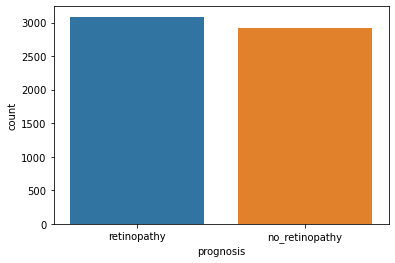

In [17]:
sns.countplot(x=df['prognosis'],hue=None)
plt.show()

##  Here target column is categorical , so need to use  label encoding
###### when ever only target column is in object datatype than for encoding ,use label encoder

In [18]:
from sklearn.preprocessing import LabelEncoder


In [19]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])
df.head(30)

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,1
1,1,63.529850,99.379736,84.852361,110.382411,1
2,2,69.003986,111.349455,109.850616,100.828246,1
3,3,82.638210,95.056128,79.666851,87.066303,1
4,4,78.346286,109.154591,90.713220,92.511770,1
5,5,52.181782,121.080264,110.488129,115.468279,1
6,6,68.722144,115.232290,92.730813,106.784960,1
7,7,58.716578,98.653683,94.172130,100.829654,1
8,8,59.121758,102.681371,96.991612,106.331045,1
9,9,63.624683,96.341053,80.919213,121.558605,1


## Check Dataset is balanced or not

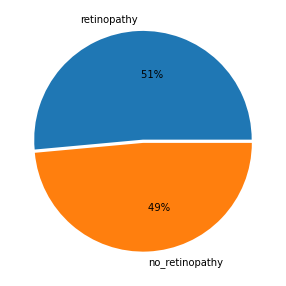

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.pie(x=df['prognosis'].value_counts(), explode=[0.03,0],autopct='%10.0f%%',labels=['retinopathy','no_retinopathy'])
plt.show()

##  ** Data is balanced **

In [21]:
import seaborn as sns

# correlation by  heatmap( to check corelation between columns)

In [22]:
coff_matrix=df.corr().round(2)

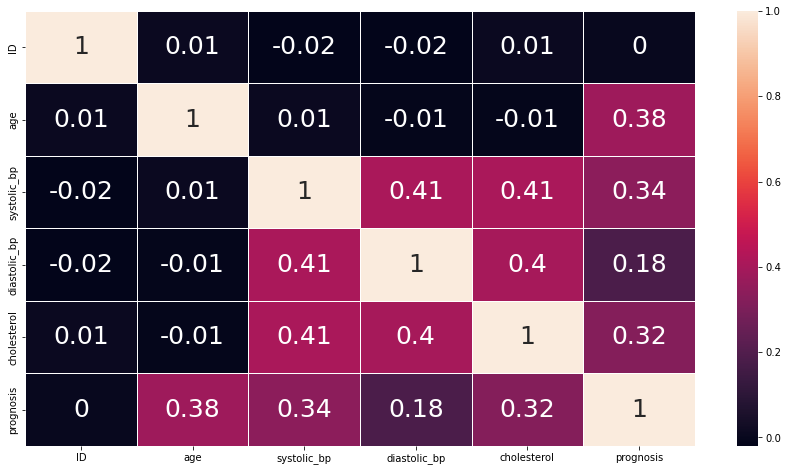

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(coff_matrix,annot=True,fmt='.2g',linewidths=0.5,annot_kws={'size':25})
plt.show()

### " there is no corelation between columns so we will not drop any column"

##  Effect of each column on target 

In [24]:
prcnt_of_effect=df[df.columns[1:]].corr()['prognosis'][:]
prcnt_of_effect

age             0.377440
systolic_bp     0.339842
diastolic_bp    0.181541
cholesterol     0.315811
prognosis       1.000000
Name: prognosis, dtype: float64

In [25]:
X=df.drop(['prognosis','ID'],axis=1)
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaling=StandardScaler()


In [67]:
import pickle
pickle.dump(scaling,open('scaling.pkl','wb'))

In [28]:
st=scaling.fit_transform(X)
st

array([[ 1.95385881, -1.44408831, -1.08668383, -1.98131478],
       [ 0.35799212, -0.12326958, -0.58598051,  0.93492889],
       [ 0.9972193 ,  0.9987116 ,  2.00521155,  0.01916893],
       ...,
       [-0.57240332, -0.21309482,  1.26379482,  1.94072729],
       [ 0.3508814 ,  0.5731393 , -0.25342752,  0.51988249],
       [ 0.23853111, -0.35563406, -0.37600957,  0.7665241 ]])

In [29]:
X_scaled=pd.DataFrame(st,columns=X.columns)

In [30]:

X_scaled

,age,systolic_bp,diastolic_bp,cholesterol
0,1.953859,-1.444088,-1.086684,-1.981315
1,0.357992,-0.123270,-0.585981,0.934929
2,0.997219,0.998712,2.005212,0.019169
3,2.589318,-0.528543,-1.123484,-1.299904
4,2.088141,0.792976,0.021526,-0.777959
...,...,...,...,...
5995,-1.267244,-0.547148,-0.403205,0.672453
5996,0.307761,-0.061424,0.311964,0.416288
5997,-0.572403,-0.213095,1.263795,1.940727
5998,0.350881,0.573139,-0.253428,0.519882


# 4. Model Building

### seperating input and output

In [31]:
X_scaled

,age,systolic_bp,diastolic_bp,cholesterol
0,1.953859,-1.444088,-1.086684,-1.981315
1,0.357992,-0.123270,-0.585981,0.934929
2,0.997219,0.998712,2.005212,0.019169
3,2.589318,-0.528543,-1.123484,-1.299904
4,2.088141,0.792976,0.021526,-0.777959
...,...,...,...,...
5995,-1.267244,-0.547148,-0.403205,0.672453
5996,0.307761,-0.061424,0.311964,0.416288
5997,-0.572403,-0.213095,1.263795,1.940727
5998,0.350881,0.573139,-0.253428,0.519882


In [32]:
y=df['prognosis']

In [33]:
y=pd.DataFrame(data=y)
y

,prognosis
0,1
1,1
2,1
3,1
4,1
...,...
5995,0
5996,1
5997,1
5998,1


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=123,stratify=y,shuffle=True)

In [35]:
X_train.shape,y_train.shape

((4800, 4), (4800, 1))

In [36]:
X_test.shape,y_test.shape

((1200, 4), (1200, 1))

# Algorithm for Binary Classification
1.logistic regression
2.Decision Trees.
3.Naive Bayes.
4.Random Forest.
5.Gradient Boosting.
6.k-Nearest Neighbors.
7.svm

# 5. Model Training

## 5.1 Logistic_Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model1=LogisticRegression()

In [39]:
model1.fit(X_train,y_train) #training

LogisticRegression()

In [40]:
y_pred_train_lg=model1.predict(X_train)

In [41]:
y_pred_test_lg=model1.predict(X_test) # testing


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('*************Testing Accuracy*************')
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_test_lg))
print('*********************************************')
print('classification_report \n',classification_report(y_test,y_pred_test_lg))
print('*********************************************')
print("Accuracy score \n",accuracy_score(y_train,y_pred_train_lg))
print("Accuracy score \n",accuracy_score(y_test,y_pred_test_lg))


*************Testing Accuracy*************
confusion_matrix 
 [[428 155]
 [170 447]]
*********************************************
classification_report 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       583
           1       0.74      0.72      0.73       617

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200

*********************************************
Accuracy score 
 0.749375
Accuracy score 
 0.7291666666666666


## 5.2 Decision_Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_classifier=DecisionTreeClassifier(max_depth= 5, criterion='gini')

In [45]:
dt_classifier.fit(X_train,y_train) #training

DecisionTreeClassifier(max_depth=5)

## Automated way to get hyperparameter

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=dt_classifier,param_grid={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,10,15,20]},cv=5)

In [47]:
grid_search_cv.fit(X_train,y_train)
grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [48]:
y_pred_train_dt=dt_classifier.predict(X_train)

In [49]:
y_pred_test_dt=dt_classifier.predict(X_test) #testing

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train_Accuracy score \n",accuracy_score(y_train,y_pred_train_dt))
print("test_Accuracy score \n",accuracy_score(y_test,y_pred_test_dt))
print('*********************************************')
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_test_dt))
print('*********************************************')
print('classification_report \n',classification_report(y_test,y_pred_test_dt))




train_Accuracy score 
 0.76
test_Accuracy score 
 0.7125
*********************************************
confusion_matrix 
 [[446 137]
 [208 409]]
*********************************************
classification_report 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       583
           1       0.75      0.66      0.70       617

    accuracy                           0.71      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.72      0.71      0.71      1200



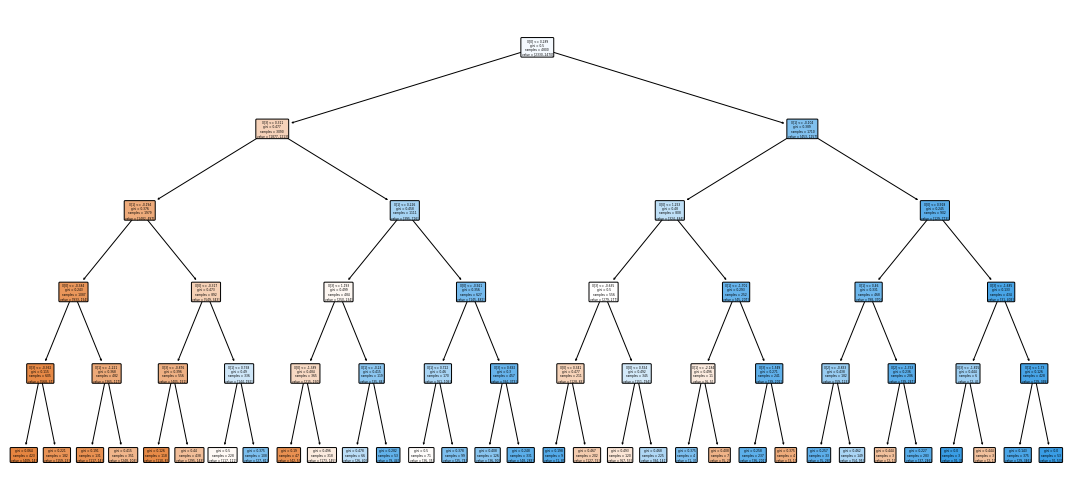

In [51]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(19,9))
plot_tree(dt_classifier,filled=True,rounded=True)
plt.show()


# 5.3 Ada Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier(base_estimator=None)

In [53]:
ada_classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [54]:
y_train_pred_ada=ada_classifier.predict(X_train)

In [55]:
y_test_pred_ada=ada_classifier.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train_Accuracy score \n",accuracy_score(y_train,y_train_pred_ada))
print("test_Accuracy score \n",accuracy_score(y_test,y_test_pred_ada))
print('*********************************************')
print('confusion_matrix \n',confusion_matrix(y_train,y_train_pred_ada))
print('*********************************************')
print('classification_report \n',classification_report(y_train,y_train_pred_ada))

train_Accuracy score 
 0.7583333333333333
test_Accuracy score 
 0.7266666666666667
*********************************************
confusion_matrix 
 [[1784  546]
 [ 614 1856]]
*********************************************
classification_report 
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      2330
           1       0.77      0.75      0.76      2470

    accuracy                           0.76      4800
   macro avg       0.76      0.76      0.76      4800
weighted avg       0.76      0.76      0.76      4800



## 5.3 Random_forest

In [57]:
from sklearn.ensemble import RandomForestClassifier





In [58]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 9, 10, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [62]:
rf_classifier=RandomForestClassifier(n_estimators=30,max_depth=5,criterion='gini',n_jobs=-1,oob_score=True,max_samples=0.8,max_features= 2, min_samples_leaf= 5,min_samples_split= 10)

In [63]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=2, max_samples=0.8,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=30, n_jobs=-1, oob_score=True)

In [64]:
y_pred_train_rf = rf_classifier.predict(X_train)

In [65]:
y_pred_test_rf =rf_classifier.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train_Accuracy score \n",accuracy_score(y_train,y_pred_train_rf))
print("test_Accuracy score \n",accuracy_score(y_test,y_pred_test_rf))
print('*********************************************')
print('confusion_matrix \n',confusion_matrix(y_train,y_pred_train_rf))
print('*********************************************')
print('classification_report \n',classification_report(y_train,y_pred_train_rf))


train_Accuracy score 
 0.7672916666666667
test_Accuracy score 
 0.7166666666666667
*********************************************
confusion_matrix 
 [[1773  557]
 [ 560 1910]]
*********************************************
classification_report 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      2330
           1       0.77      0.77      0.77      2470

    accuracy                           0.77      4800
   macro avg       0.77      0.77      0.77      4800
weighted avg       0.77      0.77      0.77      4800



In [69]:
pickle.dump(rf_classifier,open('classificationmodel.pkl','wb'))